In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

import os

import warnings
warnings.filterwarnings("ignore")

In [61]:
# creating a dataframe for dataset
data = pd.read_csv("/content/drive/MyDrive/Creditcard_csv/Default_Credit_Card.csv")

In [62]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [63]:
data.shape

(30000, 25)

In [64]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [66]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**EDA**

Class 0 Datapoints :  23364
Class 1 Datapoints :  6636


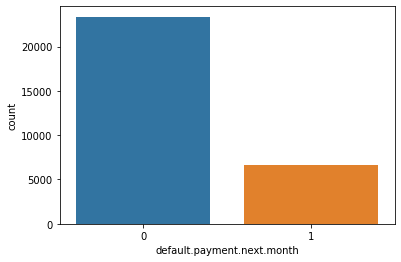

In [69]:
sns.countplot(data["default.payment.next.month"])

print("Class 0 Datapoints : ",data["default.payment.next.month"].value_counts()[0])
print("Class 1 Datapoints : ",data["default.payment.next.month"].value_counts()[1])

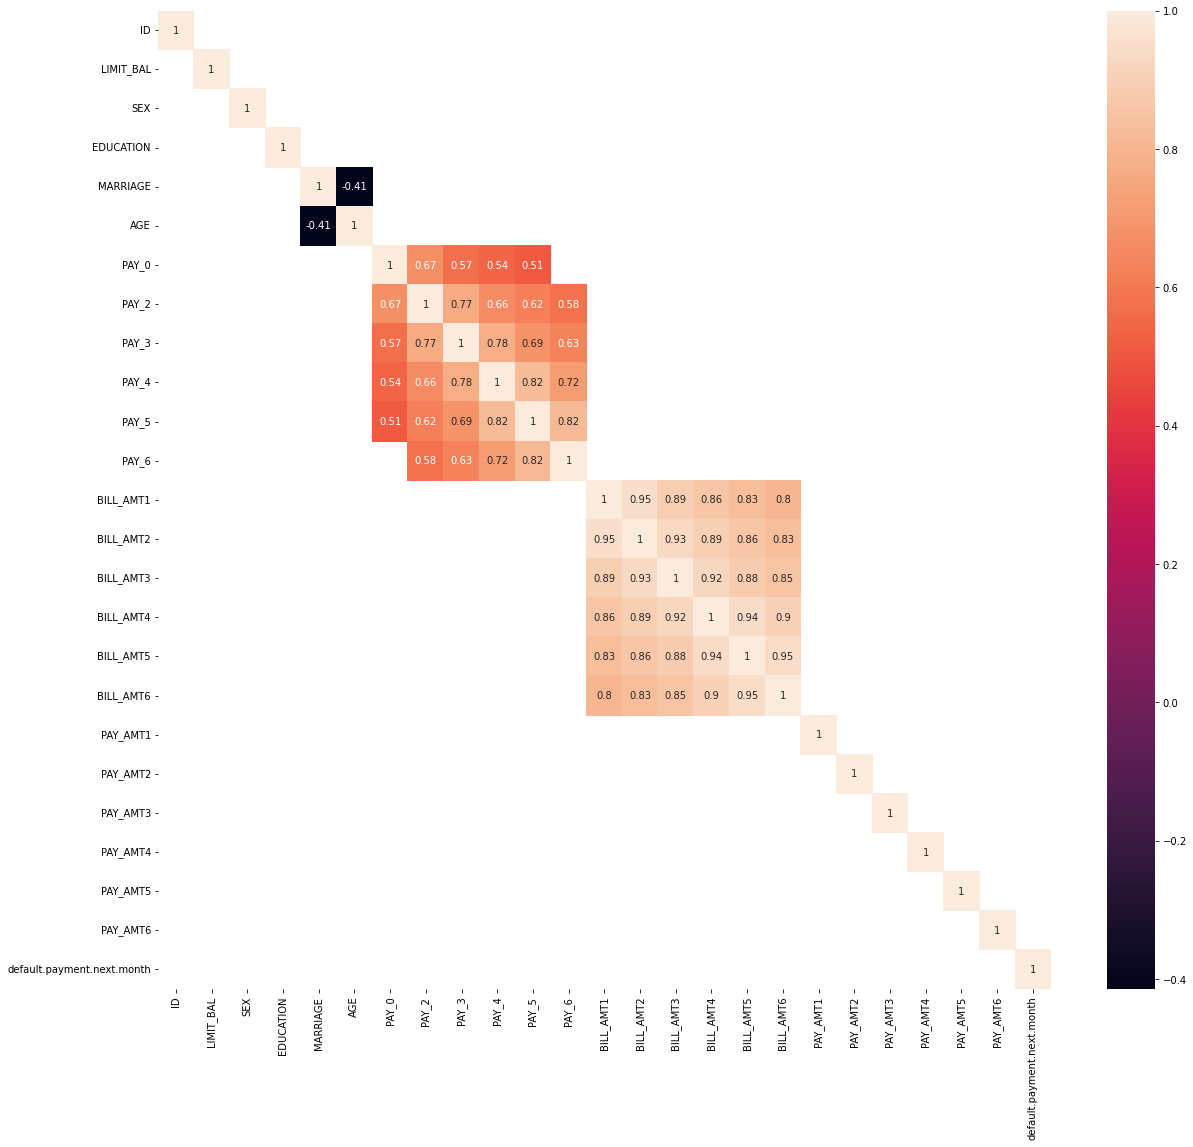

In [70]:
CORR = data.corr()

plt.figure(figsize=(20,18))
sns.heatmap(CORR[(CORR>=0.50) | (CORR<=-0.30) ] , annot=True)

*   From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent.

*   But in this scenario, there is a correlation 
because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

*   Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

*   We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.

**Correcting DataType**

In [72]:
data['default.payment.next.month'] = data['default.payment.next.month'].astype('category')

In [73]:
data[["SEX" , "EDUCATION", "MARRIAGE","AGE"]] = data[["SEX" , "EDUCATION", "MARRIAGE","AGE"]].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  float64 
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  category
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  float64 
 13  BILL_AMT2       

**Standardize the Data**

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=data.drop(labels=['default.payment.next.month',"ID"],axis=1)
Y=data['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size = 0.2 , stratify = Y)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (24000, 23)
X_test (6000, 23)
y_train (24000,)
y_test (6000,)


In [76]:
# Scaling only X and not Y

scalerX = StandardScaler().fit(X_train)
scalerY = StandardScaler().fit(np.array(y_train).reshape(-1, 1)) # To overcome : Expected 2D array, got 1D array instead Error

X_train_scaled = scalerX.transform(X_train)
X_test_scaled  = scalerX.transform(X_test)
#y_train_scaled = scalerY.transform(np.array(y_train).reshape(-1, 1))
#y_test_scaled  = scalerY.transform(np.array(y_test).reshape(-1, 1))

**Neural Network Preparation**

In [77]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , BatchNormalization

In [78]:
# Early Stopping 

from keras.callbacks import EarlyStopping , ReduceLROnPlateau 

earlystop = EarlyStopping(monitor='val_loss' , patience = 10 , verbose=2 , restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor='val_loss' , factor=0.1 , verbose=2)

In [79]:
model = Sequential()
model.add(Dense(128 , input_dim=23 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Dense(64 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Dense(32  , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Dense(1 , activation="sigmoid"))

In [80]:
# F1-score Metric is not given by default in Keras, so writing manual function for it
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [81]:
model.compile(loss="binary_crossentropy" , optimizer='adam', metrics=[get_f1])

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               3072      
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [83]:
a = model.fit(X_train_scaled , y_train , validation_data=(X_test_scaled , y_test) , epochs=100 , callbacks=[earlystop , reduceLR])

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5449 - get_f1: 0.3804 - val_loss: 0.4456 - val_get_f1: 0.4082 - lr: 0.0010
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4696 - get_f1: 0.3881 - val_loss: 0.4413 - val_get_f1: 0.4391 - lr: 0.0010
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4571 - get_f1: 0.3927 - val_loss: 0.4397 - val_get_f1: 0.4522 - lr: 0.0010
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4512 - get_f1: 0.4028 - val_loss: 0.4392 - val_get_f1: 0.4522 - lr: 0.0010
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4452 - get_f1: 0.4218 - val_loss: 0.4382 - val_get_f1: 0.4593 - lr: 0.0010
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4429 - get_f1: 0.4328 - val_loss: 0.4357 - val_get_f1: 0.4489 - lr: 0.0010
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4419 - get_

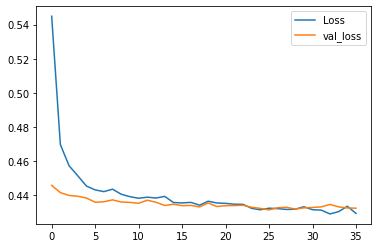

In [84]:
plt.plot(a.history["loss"] , label="Loss")
plt.plot(a.history["val_loss"] , label="val_loss")
plt.legend()

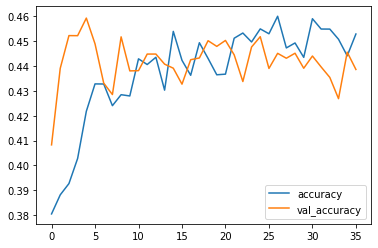

In [85]:
plt.plot(a.history["get_f1"] , label="accuracy")
plt.plot(a.history["val_get_f1"] , label="val_accuracy")
plt.legend()

**Predicting on Test Data**

In [86]:
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score,classification_report


In [87]:
y_pred = model.predict(X_test_scaled) # Sigmoid
y_pred = np.where(y_pred > 0.5, 1,0 )
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [88]:
confusion_matrix(y_test , y_pred)

array([[4449,  224],
       [ 878,  449]])

***Final Results***

In [89]:
print("Accuracy Score : ",accuracy_score(y_test , y_pred))
print("f1_score Score : ",f1_score(y_test , y_pred))
print("classification_report Score :\n ",classification_report(y_test , y_pred))

Accuracy Score :  0.8163333333333334
f1_score Score :  0.449
classification_report Score :
                precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

